In [14]:
import yfinance as yf
import pandas as pd

# List of stocks
stocks = ["MSTR", "AAPL", "TSLA", "INTC", "MCD", "KO", "NKE"]

# Function to fetch and save data for each stock
def fetch_stock_data(stocks):
    for stock in stocks:
        ticker = yf.Ticker(stock)
        # Fetch historical market data
        hist = ticker.history(period="10y")  # Adjust the period as needed
        # Adding extra details to the dataset
        hist['Ticker'] = stock
        hist['Market Cap'] = ticker.info.get("marketCap", "N/A")
        hist['P/E Ratio'] = ticker.info.get("trailingPE", "N/A")
        hist['Dividend Yield'] = ticker.info.get("dividendYield", "N/A")
        hist['52-Week High'] = ticker.info.get("fiftyTwoWeekHigh", "N/A")
        hist['52-Week Low'] = ticker.info.get("fiftyTwoWeekLow", "N/A")
        
        # Save to CSV
        filename = f"{stock}_data.csv"
        hist.to_csv(filename)
        print(f"Saved {filename}")

# Run the function
fetch_stock_data(stocks)


Saved MSTR_data.csv
Saved AAPL_data.csv
Saved TSLA_data.csv
Saved INTC_data.csv
Saved MCD_data.csv
Saved KO_data.csv
Saved NKE_data.csv


In [15]:
aapl = pd.read_csv("AAPL_data.csv")
aapl.head

<bound method NDFrame.head of                            Date        Open        High         Low  \
0     2014-12-15 00:00:00-05:00   24.652265   24.852690   23.683545   
1     2014-12-16 00:00:00-05:00   23.687996   24.532008   23.663500   
2     2014-12-17 00:00:00-05:00   23.855018   24.460745   23.788209   
3     2014-12-18 00:00:00-05:00   24.912812   25.086514   24.643352   
4     2014-12-19 00:00:00-05:00   24.999663   25.217902   24.866047   
...                         ...         ...         ...         ...   
2512  2024-12-09 00:00:00-05:00  241.830002  247.240005  241.750000   
2513  2024-12-10 00:00:00-05:00  246.889999  248.210007  245.339996   
2514  2024-12-11 00:00:00-05:00  247.960007  250.800003  246.259995   
2515  2024-12-12 00:00:00-05:00  246.889999  248.740005  245.679993   
2516  2024-12-13 00:00:00-05:00  247.820007  249.289993  246.240005   

           Close     Volume  Dividends  Stock Splits Ticker     Market Cap  \
0      24.102211  268872400        0.0 

In [16]:
tsla = pd.read_csv("TSLA_data.csv")
intc = pd.read_csv("INTC_data.csv")
mcd = pd.read_csv("MCD_data.csv")
ko = pd.read_csv("KO_data.csv")
nke = pd.read_csv("NKE_data.csv")

In [17]:
tsla

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Market Cap,P/E Ratio,Dividend Yield,52-Week High,52-Week Low
0,2014-12-15 00:00:00-05:00,13.952667,13.986667,13.511333,13.602667,78274500,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
1,2014-12-16 00:00:00-05:00,13.392667,13.578667,13.024667,13.187333,126391500,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
2,2014-12-17 00:00:00-05:00,12.870667,13.776667,12.843333,13.721333,110517000,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
3,2014-12-18 00:00:00-05:00,14.158667,14.562667,14.120000,14.550667,112249500,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
4,2014-12-19 00:00:00-05:00,14.679333,14.693333,14.300000,14.619333,103657500,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2024-12-09 00:00:00-05:00,397.609985,404.799988,378.010010,389.790009,96359200,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
2513,2024-12-10 00:00:00-05:00,392.679993,409.730011,390.850006,400.989990,97563600,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
2514,2024-12-11 00:00:00-05:00,409.700012,424.880005,402.380005,424.769989,104287600,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8
2515,2024-12-12 00:00:00-05:00,424.839996,429.299988,415.000000,418.100006,87752200,0.0,0.0,TSLA,1400324489216,119.18852,NaN,436.3,138.8


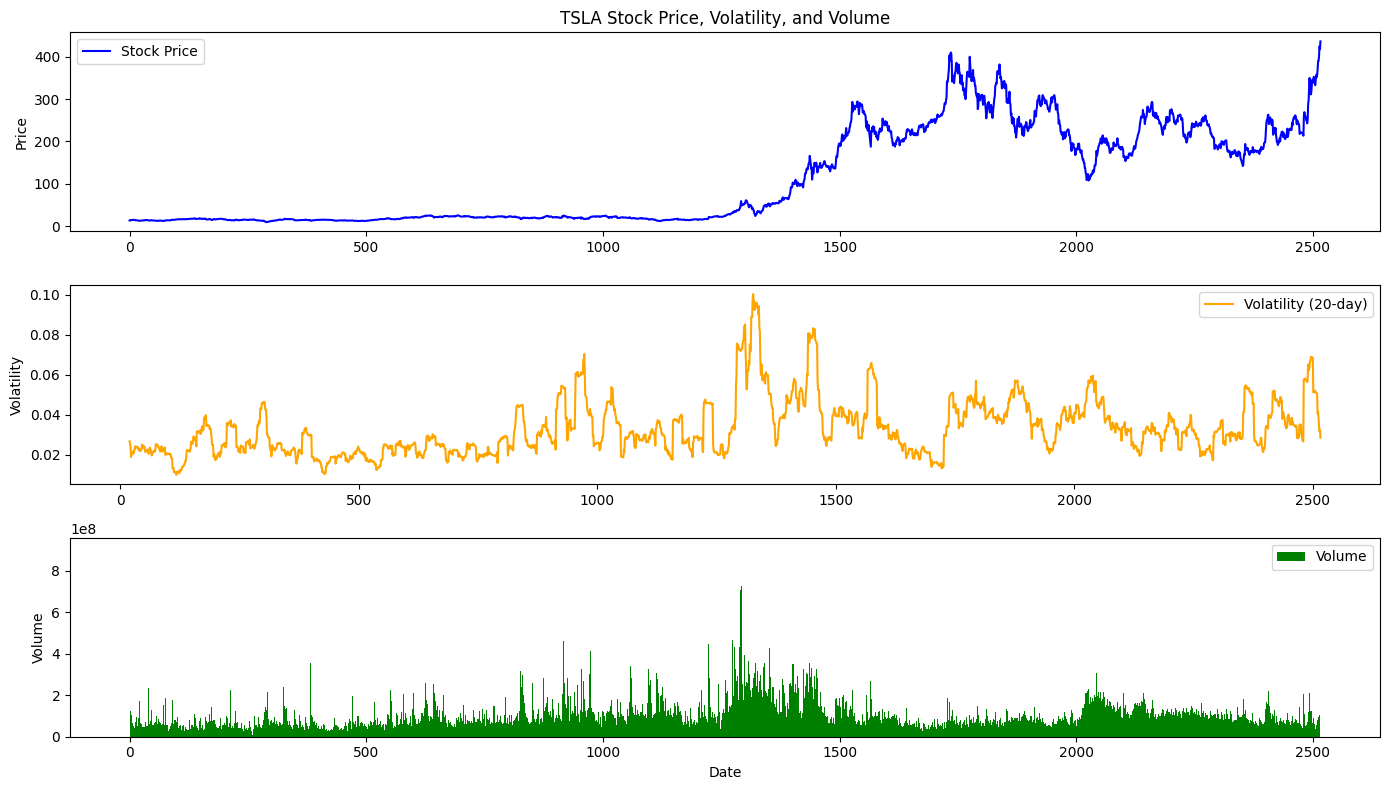

In [18]:
import matplotlib.pyplot as plt

# Calculate stock volatility (rolling standard deviation of returns)
tsla['Returns'] = tsla['Close'].pct_change()
tsla['Volatility'] = tsla['Returns'].rolling(window=20).std()  # 20-day rolling volatility

# Create the plot
plt.figure(figsize=(14, 8))

# Plot stock price
plt.subplot(3, 1, 1)
plt.plot(tsla.index, tsla['Close'], label='Stock Price', color='blue')
plt.title(f'{"TSLA"} Stock Price, Volatility, and Volume')
plt.ylabel('Price')
plt.legend()

# Plot stock volatility
plt.subplot(3, 1, 2)
plt.plot(tsla.index, tsla['Volatility'], label='Volatility (20-day)', color='orange')
plt.ylabel('Volatility')
plt.legend()

# Plot stock volume
plt.subplot(3, 1, 3)
plt.bar(tsla.index, tsla['Volume'], label='Volume', color='green', width=1)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()